# Data Exploration: Traffic Accidents in Monterrey
This notebook explores traffic accident data from the "Datos Abiertos NL" platform. The purpose of this exploration is to understand the structure, quality, and key insights from the dataset before merging it with other traffic-related data sources.

## What is "Datos Abiertos NL"?

"Datos Abiertos NL" is a platform that provides open-access public data to foster transparency and promote local actions contributing to global governance. This initiative is driven by **INFONL** (Instituto Estatal de Transparencia, Acceso a la Información y Protección de Datos Personales).

### Key Characteristics:
- Municipal datasets from the metropolitan area of Nuevo León, including Monterrey, the state capital.
- Various datasets are available for topics such as traffic, road infrastructure improvements, and public safety services.
- The information is public domain and originates from the government of Monterrey.

## Dataset Features

The traffic accident dataset provides the following features:
- Date and time of the accident
- Location (coordinates, street, and neighborhood)
- Type of accident
- Resolution

#### Imports

In [4]:
import requests
import pandas as pd

/Users/imac/Documents/GitHub/Monterrey-Collisions/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### API Test

In [5]:
# API endpoint and headers
url = "https://www.datosabiertosnl.com/api/explore/v2.1/catalog/datasets/indices-de-estadisticas-de-accidentes-viales-monterrey/records?limit=20&refine=ejercicio%3A%222023%22"

# Make the API request
response = requests.get(url)

# Check for a successful response
if response.status_code == 200:
    data = response.json()
    
    # Parse the response JSON
    data = response.json()
    
    # Extract the 'results' field which contains the records
    records = data.get("results", [])
    
    df = pd.DataFrame(records)

else:
    print(f"Error: {response.status_code}, {response.text}")

In [6]:
df.head()

,folio,ejercicio,mes,fecha,dia,hora,tipo_de_accidente,resolucion,origen_de_reporte,tipo_de_asentamiento,nombre_de_asentamiento,tipo_de_vialidad,nombre_de_la_vialidad,georreferencia,nota
0,127305,2023,Agosto,2023-08-21,Lunes,23:34:00,Estrellamiento,Peritajes,C4,Colonia,Santa Maria,Calle,Diaz Ordaz,"{'lon': -100.3762273, 'lat': 25.6720303}",La presente información es obtenida de la part...
1,126071,2023,Agosto,2023-08-21,Lunes,08:46:00,Estrellamiento,Agente del Ministerio Publico,C4,Colonia,Independencia,Calle,Morones Prieto,"{'lon': -100.3182639, 'lat': 25.6632461}",La presente información es obtenida de la part...
2,127714,2023,Agosto,2023-08-21,Lunes,00:10:00,Crucero,Agente del Ministerio Publico,C4,Colonia,Mirasol,Calle,Albahaca,"{'lon': -100.3867988, 'lat': 25.7705129}",La presente información es obtenida de la part...
3,127929,2023,Agosto,2023-08-21,Lunes,18:15:00,Lateral,Finiquitado,C4,Colonia,Altavista Invernadero,Calle,Alfonso Reyes,"{'lon': -100.2889252, 'lat': 25.6370153}",La presente información es obtenida de la part...
4,126462,2023,Agosto,2023-08-21,Lunes,19:55:00,Alcance,Finiquitado,C4,Colonia,Jardin,Calle,Constitucion,"{'lon': -100.352228, 'lat': 25.6727925}",La presente información es obtenida de la part...


### Data Loading

In [5]:
file_path = "../data/indices-de-estadisticas-de-accidentes-viales-monterrey.csv"
accidents_df = pd.read_csv(file_path)

In [6]:
accidents_df.head()

,Folio,Ejercicio,Mes,Fecha,Dia,Hora,Tipo_de_accidente,Resolución,Origen_de_reporte,Tipo_de_asentamiento,Nombre_de_asentamiento,Tipo_de_vialidad,Nombre_de_la_Vialidad,Georreferencia,Nota
0,85657,2022,Mayo,2022-05-19,Jueves,20:26:00,Crucero,Peritajes,C4,Colonia,Simon Bolivar,Calle,Penitenciaria,"25.7241218, -100.3396858",La presente información es obtenida de la part...
1,86083,2022,Mayo,2022-05-19,Jueves,19:09:00,Alcance,Investigaciones,C4,Colonia,Valle del Topo Chico,Calle,Rodrigo Gomez,"25.7314009, -100.3426639",La presente información es obtenida de la part...
2,85626,2022,Mayo,2022-05-19,Jueves,17:19:00,Alcance,Finiquitado,C4,Colonia,Topo Chico,Calle,Teran,"25.7327309, -100.3265962",La presente información es obtenida de la part...
3,85903,2022,Mayo,2022-05-19,Jueves,00:00:01,Alcance,Finiquitado,C4,Colonia,Cumbres Las Palmas,Calle,Leones,"25.7331208, -100.3997722",La presente información es obtenida de la part...
4,85780,2022,Mayo,2022-05-19,Jueves,08:48:00,Lateral,Finiquitado,C4,Colonia,Paseo de Las Mitras,Calle,Lincoln,"25.7406777, -100.3795788",La presente información es obtenida de la part...


### Data Cleaning and Overview

In [7]:
accidents_df.dtypes

Folio                      int64
Ejercicio                  int64
Mes                       object
Fecha                     object
Dia                       object
Hora                      object
Tipo_de_accidente         object
Resolución                object
Origen_de_reporte         object
Tipo_de_asentamiento      object
Nombre_de_asentamiento    object
Tipo_de_vialidad          object
Nombre_de_la_Vialidad     object
Georreferencia            object
Nota                      object
dtype: object

In [8]:
accidents_df.columns = accidents_df.columns.str.lower().str.strip()

In [13]:
accidents_df.columns

Index(['folio', 'ejercicio', 'mes', 'fecha', 'dia', 'hora',
       'tipo_de_accidente', 'resolución', 'origen_de_reporte',
       'tipo_de_asentamiento', 'nombre_de_asentamiento', 'tipo_de_vialidad',
       'nombre_de_la_vialidad', 'georreferencia', 'nota'],
      dtype='object')

In [14]:
#accidents_df = accidents_df[(accidents_df['ejercicio'] > 2022)]

In [15]:
accidents_df.ejercicio.unique()

array([2022, 2024, 2023, 2021])

In [16]:
accidents_df.isnull().sum()

folio                         0
ejercicio                     0
mes                           0
fecha                         0
dia                           0
hora                         37
tipo_de_accidente             0
resolución                    0
origen_de_reporte             0
tipo_de_asentamiento          0
nombre_de_asentamiento        0
tipo_de_vialidad              0
nombre_de_la_vialidad         0
georreferencia                0
nota                      16208
dtype: int64

In [9]:
for column in accidents_df.columns:
    unique_values = accidents_df[column].unique()
    print(f"Column: {column}")
    print(f"{unique_values}")
    print("-"*40)

Column: folio
[ 85657  86083  85626 ... 155038 157805 155330]
----------------------------------------
Column: ejercicio
[2022 2024 2023 2021]
----------------------------------------
Column: mes
['Mayo' 'Junio' 'Julio' 'Agosto' 'Septiembre' 'Octubre' 'Enero'
 'Noviembre' 'Febrero' 'Diciembre' 'Marzo' 'Abril']
----------------------------------------
Column: fecha
['2022-05-19' '2022-05-20' '2022-05-21' ... '2024-06-28' '2024-06-29'
 '2024-06-30']
----------------------------------------
Column: dia
['Jueves' 'Viernes' 'Sabado' 'Domingo' 'Lunes' 'Martes' 'Miercoles']
----------------------------------------
Column: hora
['20:26:00' '19:09:00' '17:19:00' ... '20:08' '13:50' '16:46']
----------------------------------------
Column: tipo_de_accidente
['Crucero' 'Alcance' 'Lateral' 'Estrellamiento' 'Otro' 'De Reversa'
 'Atropello' 'Volcadura' 'Caida de Persona' 'De Frente' 'Incendio'
 'Salida de Camino' 'Vehiculo Estacionado' 'Frontal' 'Objeto Fijo'
 'Reversa' 'Diverso' 'Bache' 'No Guardo 

In [17]:
accidents_df.nota.unique()

array(['La presente información es obtenida de la parte de hecho de tránsito, por lo que la georreferencia que se indica es aproximada en función a la calle y colonia.',
       nan], dtype=object)

In [10]:
accidents_df = accidents_df.drop(['folio', 'nota', 'tipo_de_asentamiento', 'tipo_de_vialidad'], axis=1)

In [21]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92064 entries, 0 to 92063
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   folio                   92064 non-null  int64         
 1   ejercicio               92064 non-null  int64         
 2   mes                     92064 non-null  object        
 3   fecha                   92064 non-null  datetime64[ns]
 4   dia                     92064 non-null  object        
 5   hora                    92027 non-null  object        
 6   tipo_de_accidente       92064 non-null  object        
 7   resolución              92064 non-null  object        
 8   origen_de_reporte       92064 non-null  object        
 9   tipo_de_asentamiento    92064 non-null  object        
 10  nombre_de_asentamiento  92064 non-null  object        
 11  tipo_de_vialidad        92064 non-null  object        
 12  nombre_de_la_vialidad   92064 non-null  object

In [19]:
accidents_df['fecha'] = pd.to_datetime(accidents_df['fecha'])

In [20]:
accidents_df.shape

(92064, 14)

In [22]:
# Remove the 'Year' and 'Month' columns as they're now redundant
accidents_df = accidents_df.drop(['ejercicio', 'mes'], axis=1)

In [25]:
accidents_df.rename(columns={'nombre_de_asentamiento': 'colonia', 'nombre_de_la_vialidad': 'calle'}, inplace=True)
accidents_df.head()

,folio,fecha,dia,hora,tipo_de_accidente,resolución,origen_de_reporte,colonia,calle,georreferencia
0,85657,2022-05-19,Jueves,20:26:00,Crucero,Peritajes,C4,Simon Bolivar,Penitenciaria,"25.7241218, -100.3396858"
1,86083,2022-05-19,Jueves,19:09:00,Alcance,Investigaciones,C4,Valle del Topo Chico,Rodrigo Gomez,"25.7314009, -100.3426639"
2,85626,2022-05-19,Jueves,17:19:00,Alcance,Finiquitado,C4,Topo Chico,Teran,"25.7327309, -100.3265962"
3,85903,2022-05-19,Jueves,00:00:01,Alcance,Finiquitado,C4,Cumbres Las Palmas,Leones,"25.7331208, -100.3997722"
4,85780,2022-05-19,Jueves,08:48:00,Lateral,Finiquitado,C4,Paseo de Las Mitras,Lincoln,"25.7406777, -100.3795788"


### Exploratory Data Analysis

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Figure size 1400x800 with 0 Axes>

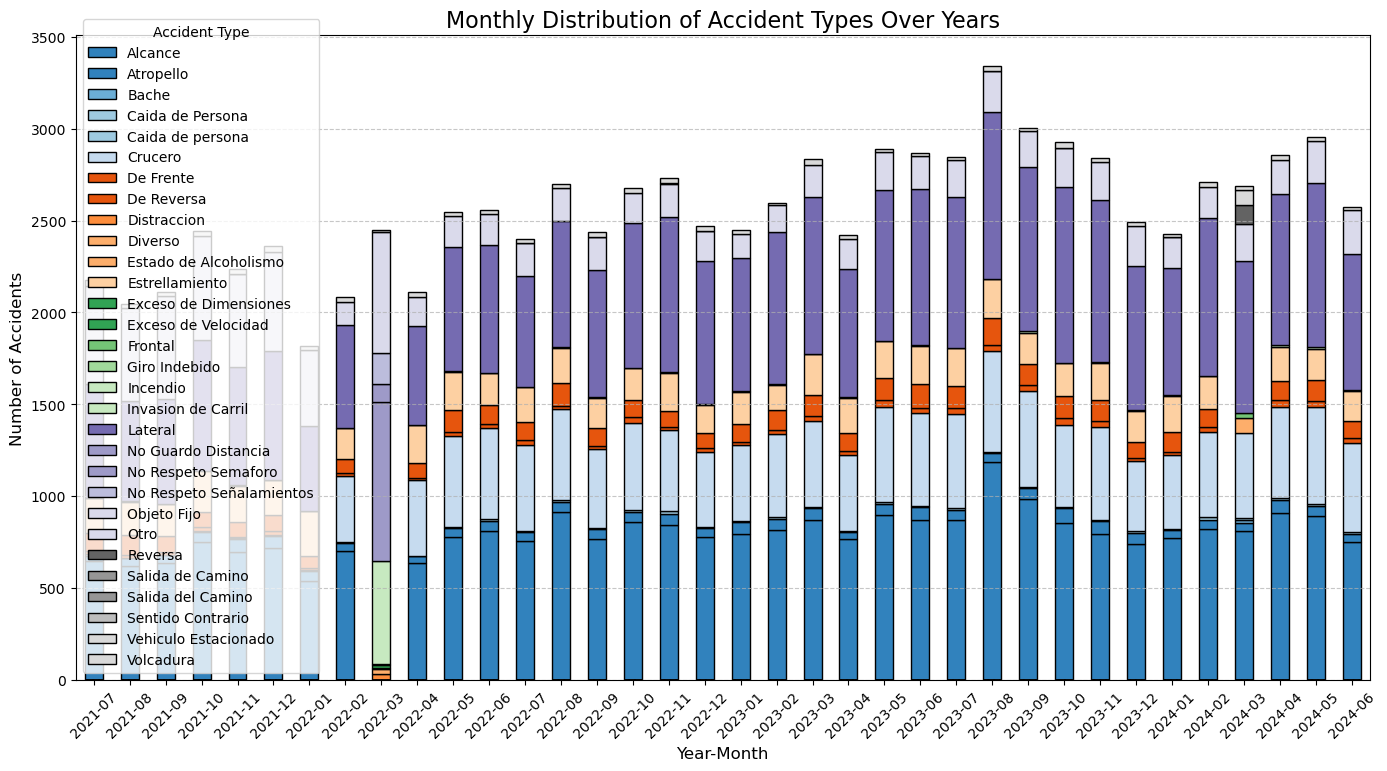

In [48]:
grouped_date_data = accidents_df.groupby([accidents_df['fecha'].dt.to_period('M'), 'tipo_de_accidente']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
grouped_date_data.plot(kind='bar', stacked=True, figsize=(14, 8), edgecolor='black', colormap='tab20c')

plt.title('Monthly Distribution of Accident Types Over Years', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Accident Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

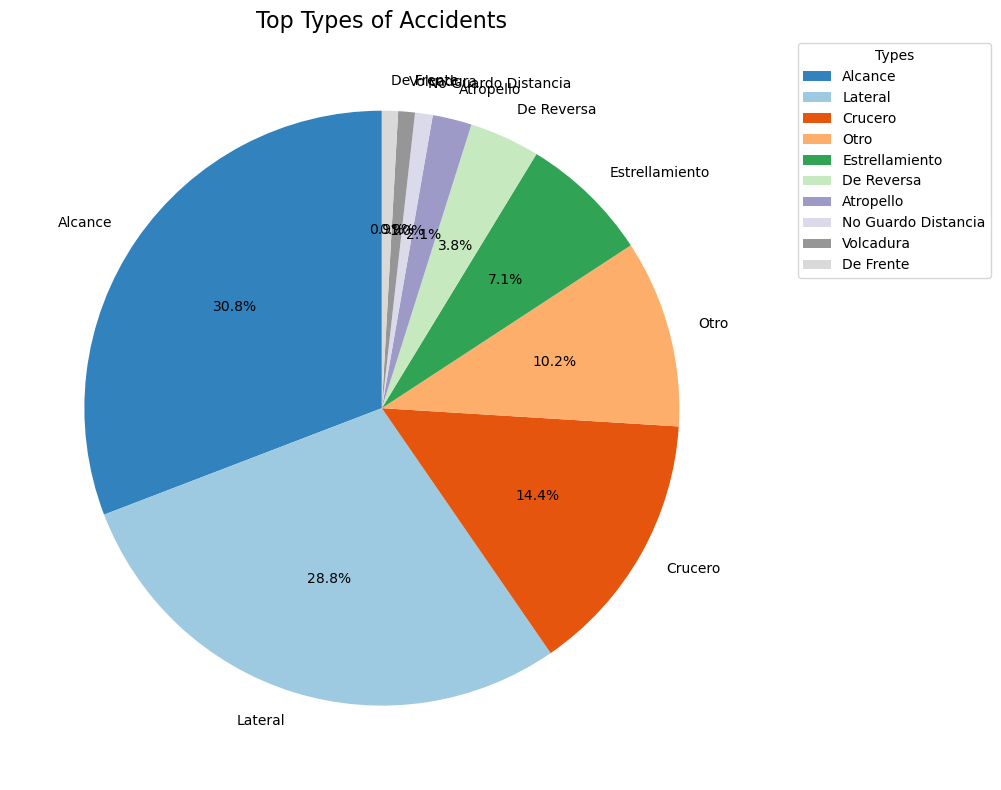

In [101]:
type_counts = accidents_df.tipo_de_accidente.value_counts()
top_types = type_counts.head(10)

plt.figure(figsize=(10, 8))
top_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20c')

plt.title('Top Types of Accidents', fontsize=16)
plt.ylabel('')
plt.legend(title='Types', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

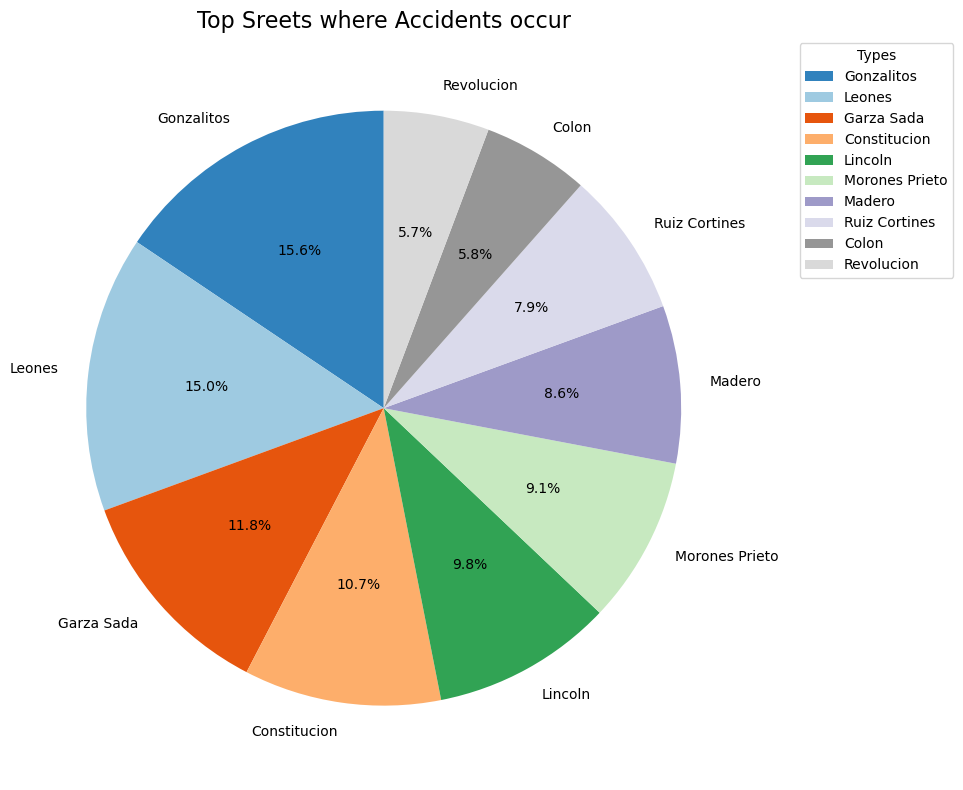

In [103]:
street_counts = accidents_df.calle.value_counts()
top_streets = street_counts.head(10)

plt.figure(figsize=(10, 8))
top_streets.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20c')

plt.title('Top Sreets where Accidents occur', fontsize=16)
plt.ylabel('')
plt.legend(title='Types', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

In [73]:
accidents_df[accidents_df.hora.isnull() == True].head()

,folio,fecha,dia,hora,tipo_de_accidente,resolución,origen_de_reporte,colonia,calle,georreferencia
10,85963,2022-05-20,Viernes,NaN,Alcance,Finiquitado,C4,Roma,Garza Sada,"25.6551007, -100.2945953"
12,85796,2022-05-20,Viernes,NaN,Lateral,Peritajes,C4,Centro,Zuazua,"25.6636645, -100.310988"
17,85400,2022-05-20,Viernes,NaN,Alcance,Finiquitado,C4,Centro,Juan I Ramon,"25.6713392, -100.3155804"
20,86164,2022-05-20,Viernes,NaN,Estrellamiento,Peritajes,C4,Centro,Carlos Salazar,"25.6836973, -100.3268609"
21,86198,2022-05-20,Viernes,NaN,Lateral,Finiquitado,C4,Madero,Colon,"25.6839012, -100.2835786"


In [79]:
accidents_df[accidents_df.hora == "sd"].value_counts()

folio   fecha       dia        hora  tipo_de_accidente  resolución   origen_de_reporte  colonia           calle                 georreferencia          
95283   2022-10-19  Miercoles  sd    Crucero            Peritajes    C4                 Mitras Norte      Ruiz Cortines         25.7049224, -100.3503038    1
134563  2023-10-23  Lunes      sd    Alcance            Finiquitado  C4                 San Bernabe       Aztlan                25.759666, -100.368915      1
138434  2023-12-01  Viernes    sd    Alcance            Finiquitado  C4                 Mitras Norte      Fidel Velazquez       25.714052, -100.349822      1
138424  2023-12-05  Martes     sd    De Reversa         Finiquitado  C4                 Mexico            Rio Aguanaval         25.643553, -100.297129      1
138398  2023-12-01  Viernes    sd    Alcance            Finiquitado  C4                 La Florida        Garza Sada            25.662633, -100.297459      1
                                                         

In [81]:
accidents_df[accidents_df.hora == "SD"].value_counts()

folio   fecha       dia        hora  tipo_de_accidente  resolución   origen_de_reporte  colonia              calle                 georreferencia          
64290   2021-10-06  Miercoles  SD    Alcance            Finiquitado  C4                 Loma Linda           Mar Arabigo           25.7456101, -100.3639545    1
141461  2024-01-09  Martes     SD    Crucero            Peritajes    C4                 Mirasol              No Reeleccion         25.764059, -100.396481      1
142070  2024-01-19  Viernes    SD    Lateral            Finiquitado  C4                 Mitras Norte         Gonzalitos            25.714052, -100.349822      1
142029  2024-01-16  Martes     SD    Otro               Finiquitado  C4                 Valle Del Mirador    Paseo Virginia        25.63926, -100.311897       1
141727  2024-01-12  Viernes    SD    Estrellamiento     Peritajes    C4                 Buenos Aires         Revolucion            25.667305, -100.2842846     1
                                       

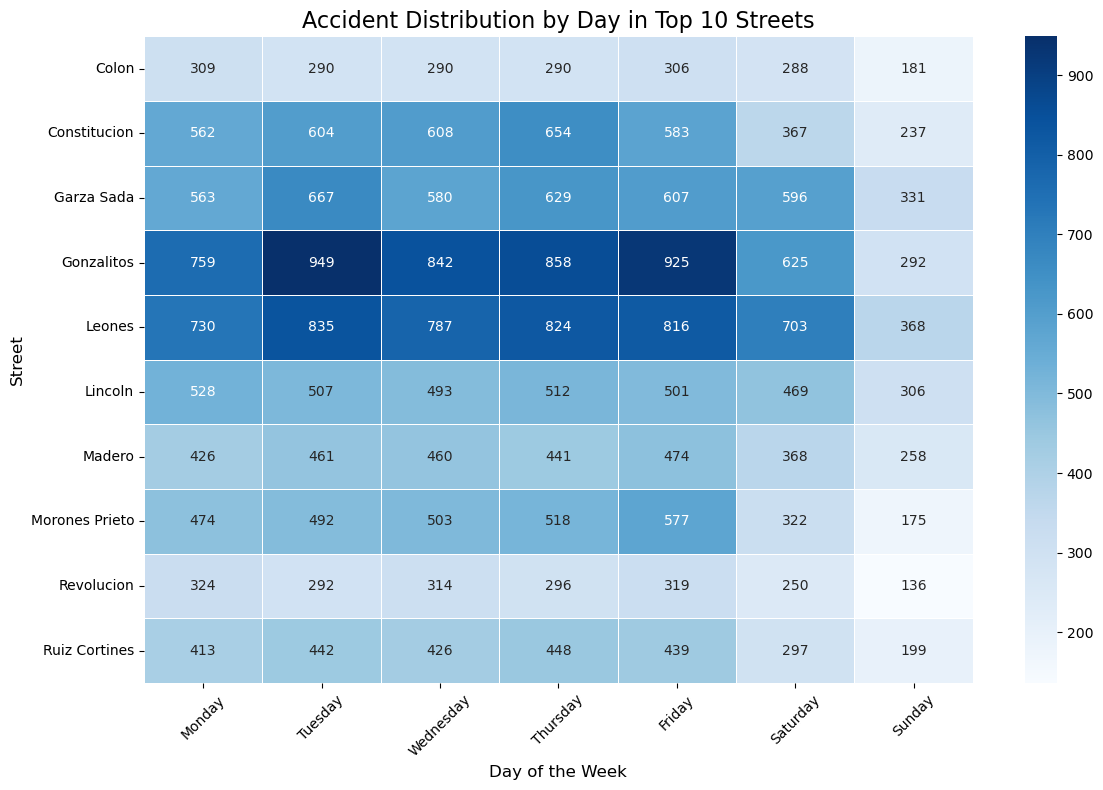

In [105]:
top_streets = street_counts.head(10).index
top_streets_data = accidents_df[accidents_df['calle'].isin(top_streets)]

heatmap_data = top_streets_data.pivot_table(index='calle', columns=top_streets_data.fecha.dt.day_name(), aggfunc='size', fill_value=0)

# Reorder days to match the order of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[days_order]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt="d", linewidths=0.5)

plt.title('Accident Distribution by Day in Top 10 Streets', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Street', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

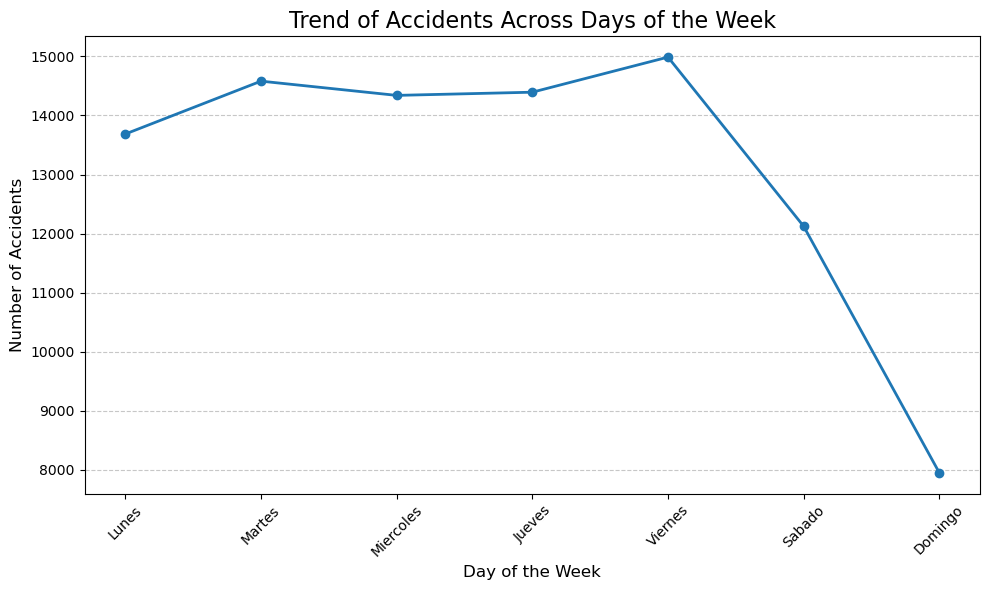

In [115]:
day_counts = accidents_df['dia'].value_counts()

days_order = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']

day_counts = day_counts.reindex(days_order)

plt.figure(figsize=(10, 6))
plt.plot(day_counts.index, day_counts.values, marker='o', linestyle='-', linewidth=2)

plt.title('Trend of Accidents Across Days of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

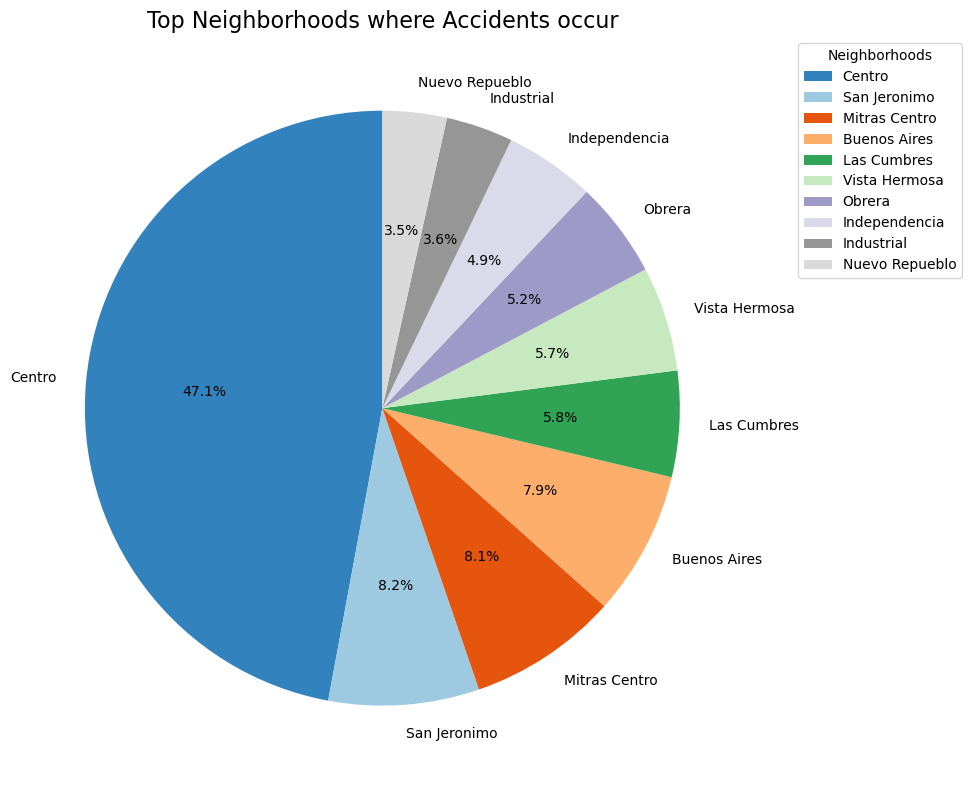

In [117]:
neighborhood_counts = accidents_df.colonia.value_counts()
top_neighborhoods = neighborhood_counts.head(10)

plt.figure(figsize=(10, 8))
top_neighborhoods.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20c')

plt.title('Top Neighborhoods where Accidents occur', fontsize=16)
plt.ylabel('')
plt.legend(title='Neighborhoods', loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

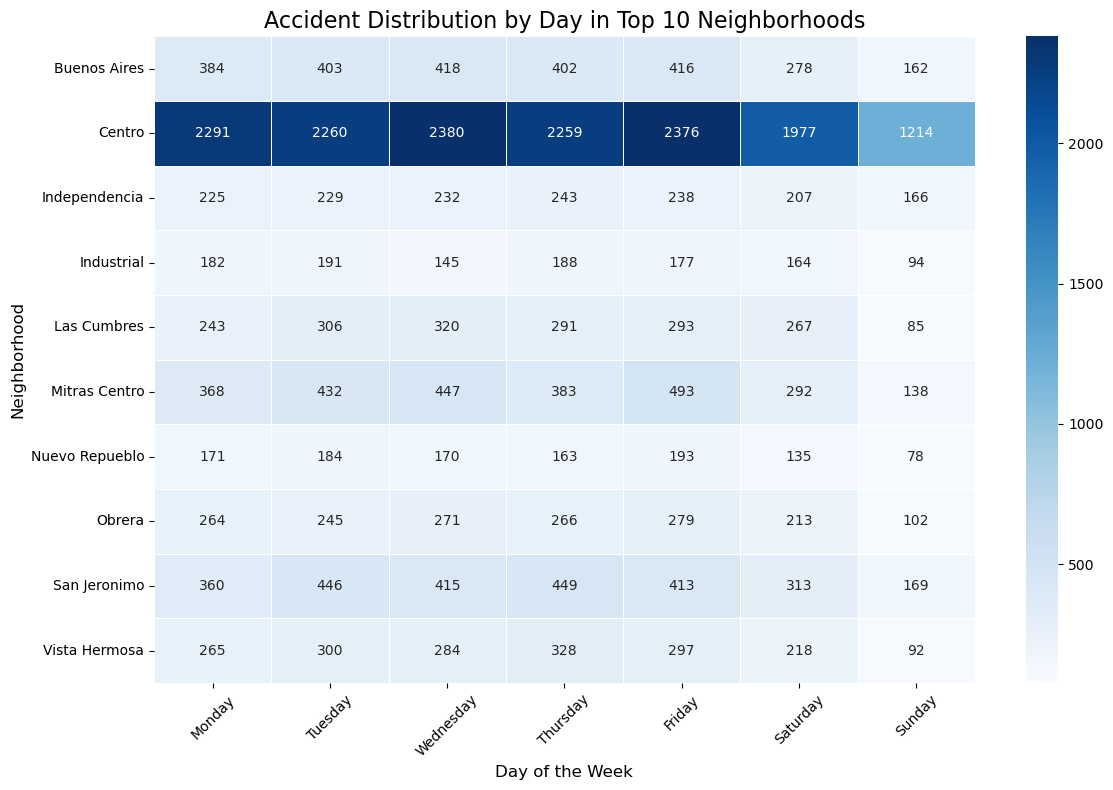

In [121]:
top_neighborhoods = neighborhood_counts.head(10).index
top_neighborhoods_data = accidents_df[accidents_df['colonia'].isin(top_neighborhoods)]

heatmap_data = top_neighborhoods_data.pivot_table(index='colonia', columns=top_neighborhoods_data.fecha.dt.day_name(), aggfunc='size', fill_value=0)

# Reorder days to match the order of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data[days_order]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt="d", linewidths=0.5)

plt.title('Accident Distribution by Day in Top 10 Neighborhoods', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [131]:
accidents_df.colonia.value_counts().head(20)

colonia
Centro              14757
San Jeronimo         2565
Mitras Centro        2553
Buenos Aires         2463
Las Cumbres          1805
Vista Hermosa        1784
Obrera               1640
Independencia        1540
Industrial           1141
Nuevo Repueblo       1094
Obispado             1050
Urdiales             1025
Contry               1023
Santa Maria          1003
Moderna               942
Leones                860
Topo Chico            808
Las Brisas            802
Fracc Gonzalitos      801
Del Norte             799
Name: count, dtype: int64

In [135]:
accidents_df.calle.value_counts().head(20)

calle
Gonzalitos             5250
Leones                 5063
Garza Sada             3973
Constitucion           3615
Lincoln                3316
Morones Prieto         3061
Madero                 2888
Ruiz Cortines          2664
Colon                  1954
Revolucion             1931
Fidel Velazquez        1847
Alfonso Reyes          1837
Aztlan                 1783
Lazaro Cardenas        1548
Felix U Gomez          1366
Venustiano Carranza    1328
Cuauhtemoc             1196
Rangel Frias           1195
Bernardo Reyes         1187
Carretera Nacional     1156
Name: count, dtype: int64

In [12]:
accidents_df.ejercicio.value_counts()

ejercicio
2023    33513
2022    28974
2024    16208
2021    13369
Name: count, dtype: int64

### Export clean data

In [32]:
acc_df = accidents_df[accidents_df.ejercicio == 2023]

In [33]:
acc_df = acc_df.reset_index()

In [34]:
acc_df = acc_df.drop(['index', 'ejercicio', 'mes', 'dia', 'origen_de_reporte', 'resolución'], axis=1)

In [35]:
acc_df

,fecha,hora,tipo_de_accidente,nombre_de_asentamiento,nombre_de_la_vialidad,georreferencia
0,2023-01-03,14:24:00,Estrellamiento,Del Norte,Ladron de Guevara,"25.7123781, -100.303487"
1,2023-01-03,16:12:00,Crucero,Sarabia,Juarez,"25.6892769, -100.3124103"
2,2023-01-03,21:49:00,Crucero,Centro,Juarez,"25.673387212606816, -100.31475462387968"
3,2023-01-03,15:10:00,Alcance,Las Cumbres,Leones,"25.732164432562826, -100.39857386991704"
4,2023-01-04,05:58:00,Crucero,Loma Linda,Aztlan,"25.7484012, -100.3618302"
...,...,...,...,...,...,...
33508,2023-12-31,16:00:00,Otro,San Bernabe,Aztlan,"25.761611, -100.382895"
33509,2023-12-31,17:14:00,Alcance,Real Cumbres,Lincoln,"25.729299, -100.402097"
33510,2023-12-31,17:03:00,Lateral,Las Cumbres,Paseo de los Estudiantes,"25.704687, -100.370741"
33511,2023-12-31,03:54:00,Otro,Loma Larga,Morones Prieto,"25.668027, -100.344627"


In [36]:
file_path = "../data/accidents_1.csv"
acc_df.to_csv(file_path, index=False)